#*Задача :*

классификация типов преступлений на датасете убийств

# Первичный анализ

---



---



*Содержание*

Проект учёта убийств (The Murder Accountability Project) представляет собой наиболее полную базу данных об убийствах, доступную на данный момент в Соединённых Штатах. Этот набор данных включает в себя:

  1 - Данные из Отчёта о дополнительной homicide-статистике ФБР за период с 1976 года по настоящее время.

  2 - Данные, полученные в соответствии с Законом о свободе информации, о более чем 22 000 убийствах, которые не были сообщены в Министерство юстиции.

Набор данных содержит информацию о возрасте, расе, поле, этнической принадлежности жертв и преступников, а также о взаимоотношениях между жертвой и преступником и об использованном оружии.

*Благодарности*

Данные были собраны и предоставлены Проектом учёта убийств (Murder Accountability Project), основанным Томасом Харгроувом.

*p.s.*
К сожалению, когда я качала датасет, то не обратила внимания на его объям (62,5к строк - 118,81 Мб) поэтому в этом задании я решила использовать первые 1200 строк, и все столбцы, что подходит под требования.

Первые 5 строк

In [23]:
import pandas as pd
cri = pd.read_csv('/content/drive/MyDrive/database.csv')
crim = pd.concat([cri], keys=['RecordID'])
crimes = crim.head(1200).copy()
crimes.head()

/tmp/ipython-input-3083637923.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  cri = pd.read_csv('/content/drive/MyDrive/database.csv')


Record ID Agency Code Agency Name       Agency Type       City  \
RecordID 0          1     AK00101   Anchorage  Municipal Police  Anchorage   
         1          2     AK00101   Anchorage  Municipal Police  Anchorage   
         2          3     AK00101   Anchorage  Municipal Police  Anchorage   
         3          4     AK00101   Anchorage  Municipal Police  Anchorage   
         4          5     AK00101   Anchorage  Municipal Police  Anchorage   

             State  Year    Month  Incident              Crime Type  ...  \
RecordID 0  Alaska  1980  January         1  Murder or Manslaughter  ...   
         1  Alaska  1980    March         1  Murder or Manslaughter  ...   
         2  Alaska  1980    March         2  Murder or Manslaughter  ...   
         3  Alaska  1980    April         1  Murder or Manslaughter  ...   
         4  Alaska  1980    April         2  Murder or Manslaughter  ...   

           Victim Ethnicity Perpetrator Sex  Perpetrator Age  \
RecordID 0          Unknown            Male               15   
         1          Unknown            Male               42   
         2          Unknown         Unknown                0   
         3          Unknown            Male               42   
         4          Unknown         Unknown                0   

                         Perpetrator Race Perpetrator Ethnicity  Relationship  \
RecordID 0  Native American/Alaska Native               Unknown  Acquaintance   
         1                          White               Unknown  Acquaintance   
         2                        Unknown               Unknown       Unknown   
         3                          White               Unknown  Acquaintance   
         4                        Unknown               Unknown       Unknown   

                   Weapon Victim Count Perpetrator Count Record Source  
RecordID 0   Blunt Object            0                 0           FBI  
         1  Strangulation            0                 0           FBI  
         2        Unknown            0                 0           FBI  
         3  Strangulation            0                 0           FBI  
         4        Unknown            0                 1           FBI  

[5 rows x 24 columns]

Последние 5 значений:

In [24]:
crimes.tail()

Record ID Agency Code Agency Name       Agency Type     City  \
RecordID 1195       1196     CA00109     Oakland  Municipal Police  Alameda   
         1196       1197     CA00109     Oakland  Municipal Police  Alameda   
         1197       1198     CA00109     Oakland  Municipal Police  Alameda   
         1198       1199     CA00109     Oakland  Municipal Police  Alameda   
         1199       1200     CA00109     Oakland  Municipal Police  Alameda   

                    State  Year      Month  Incident              Crime Type  \
RecordID 1195  California  1980  September         7  Murder or Manslaughter   
         1196  California  1980  September         8  Murder or Manslaughter   
         1197  California  1980  September         9  Murder or Manslaughter   
         1198  California  1980  September        10  Murder or Manslaughter   
         1199  California  1980  September        11  Murder or Manslaughter   

               ... Victim Ethnicity Perpetrator Sex  Perpetrator Age  \
RecordID 1195  ...     Not Hispanic            Male               24   
         1196  ...     Not Hispanic         Unknown                0   
         1197  ...     Not Hispanic            Male               28   
         1198  ...     Not Hispanic         Unknown                0   
         1199  ...     Not Hispanic         Unknown                0   

              Perpetrator Race Perpetrator Ethnicity  Relationship  \
RecordID 1195            Black          Not Hispanic  Acquaintance   
         1196          Unknown               Unknown       Unknown   
         1197            Black          Not Hispanic  Acquaintance   
         1198          Unknown               Unknown       Unknown   
         1199          Unknown               Unknown       Unknown   

                     Weapon Victim Count Perpetrator Count Record Source  
RecordID 1195         Rifle            0                 0           FBI  
         1196  Blunt Object            0                 0           FBI  
         1197       Handgun            0                 0           FBI  
         1198         Knife            0                 0           FBI  
         1199         Knife            0                 0           FBI  

[5 rows x 24 columns]

Названия всех колонок

In [25]:
crimes.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

Число строк и столбцов

In [26]:
crimes.shape

(1200, 24)

Смотрим информацию по колонке: индекс, название колонки, количество строк, наличие нулей, их количество, тип данных

In [27]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1200 entries, ('RecordID', 0) to ('RecordID', 1199)
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Record ID              1200 non-null   int64 
 1   Agency Code            1200 non-null   object
 2   Agency Name            1200 non-null   object
 3   Agency Type            1200 non-null   object
 4   City                   1200 non-null   object
 5   State                  1200 non-null   object
 6   Year                   1200 non-null   int64 
 7   Month                  1200 non-null   object
 8   Incident               1200 non-null   int64 
 9   Crime Type             1200 non-null   object
 10  Crime Solved           1200 non-null   object
 11  Victim Sex             1200 non-null   object
 12  Victim Age             1200 non-null   int64 
 13  Victim Race            1200 non-null   object
 14  Victim Ethnicity       1200 non-null   objec

Статистика числовых признаков

In [28]:
crimes.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,1980.0,2.655833,36.372500,0.088333,0.170000
std,346.554469,0.0,2.948100,32.567893,0.368298,0.528835
min,1.000000,1980.0,1.000000,0.000000,0.000000,0.000000
25%,300.750000,1980.0,1.000000,24.000000,0.000000,0.000000
50%,600.500000,1980.0,1.000000,32.000000,0.000000,0.000000
75%,900.250000,1980.0,3.000000,45.000000,0.000000,0.000000
max,1200.000000,1980.0,41.000000,998.000000,3.000000,8.000000


In [29]:
mis_dats = crimes.isnull().sum() # количество пропусков по каждой колонке
mis_prosents = (mis_dats / len(crimes)) * 100 # процент пропусков по каждой колонке
print(mis_dats, '\n')
print(mis_prosents)

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64 

Record ID                0.0
Agency Code              0.0
Agency Name              0.0
Agency Type              0.0
City                     0.0
State                    0.0
Year                     0.0
Month                    0.0
Incident                 0.0
Crime Type               0.0
Crime Solved             0.0
Victim Sex        

вывод: нет потерянных данных

Удаляем ненужные колонки, они не нужны, т.к. мы не используем данные из них в нашей задаче.

Также заменяем нулевые значения в Perpetrator Age для корректного отображения на графике.

In [30]:
from sklearn.impute import SimpleImputer
import numpy as np

columns_to_drop = ['Record ID', 'Agency Code', 'Record Source', 'Incident']
crimes = crimes.drop(columns=[i for i in columns_to_drop if i in crimes.columns])

nimb_cols = crimes.select_dtypes(include=[np.number]).columns
imputer1 = SimpleImputer(strategy='median')
crimes[nimb_cols] = imputer1.fit_transform(crimes[nimb_cols])

cat_cols = crimes.select_dtypes(include=['object']).columns
imputer2 = SimpleImputer(strategy='most_frequent')
crimes[cat_cols] = imputer2.fit_transform(crimes[cat_cols])

crimes.loc[crimes['Perpetrator Age'] == 0, 'Perpetrator Age'] = np.nan

print(f"Размер после очистки: {crimes.shape}")

Размер после очистки: (1200, 20)


# анализ EDA

In [31]:
print(crimes['Crime Type'].value_counts()) # анализ целевой переменной

Crime Type
Murder or Manslaughter        1177
Manslaughter by Negligence      23
Name: count, dtype: int64


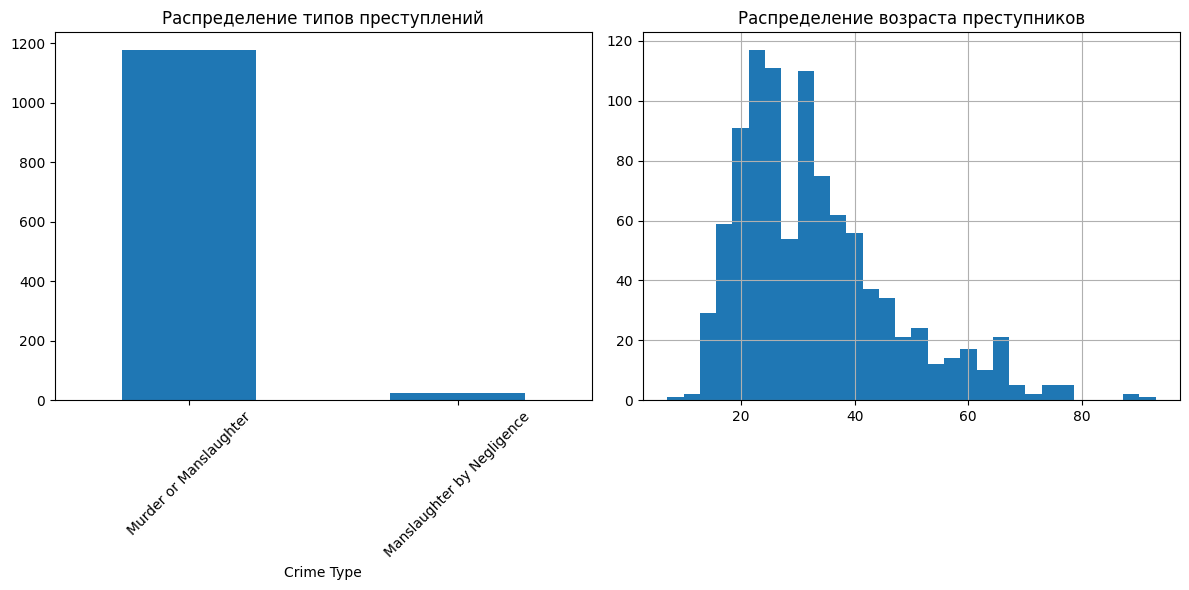

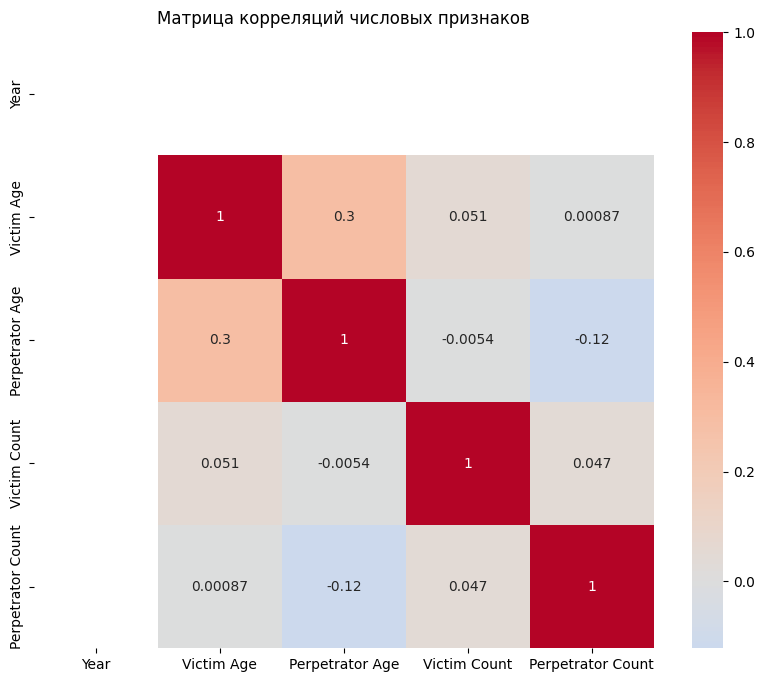

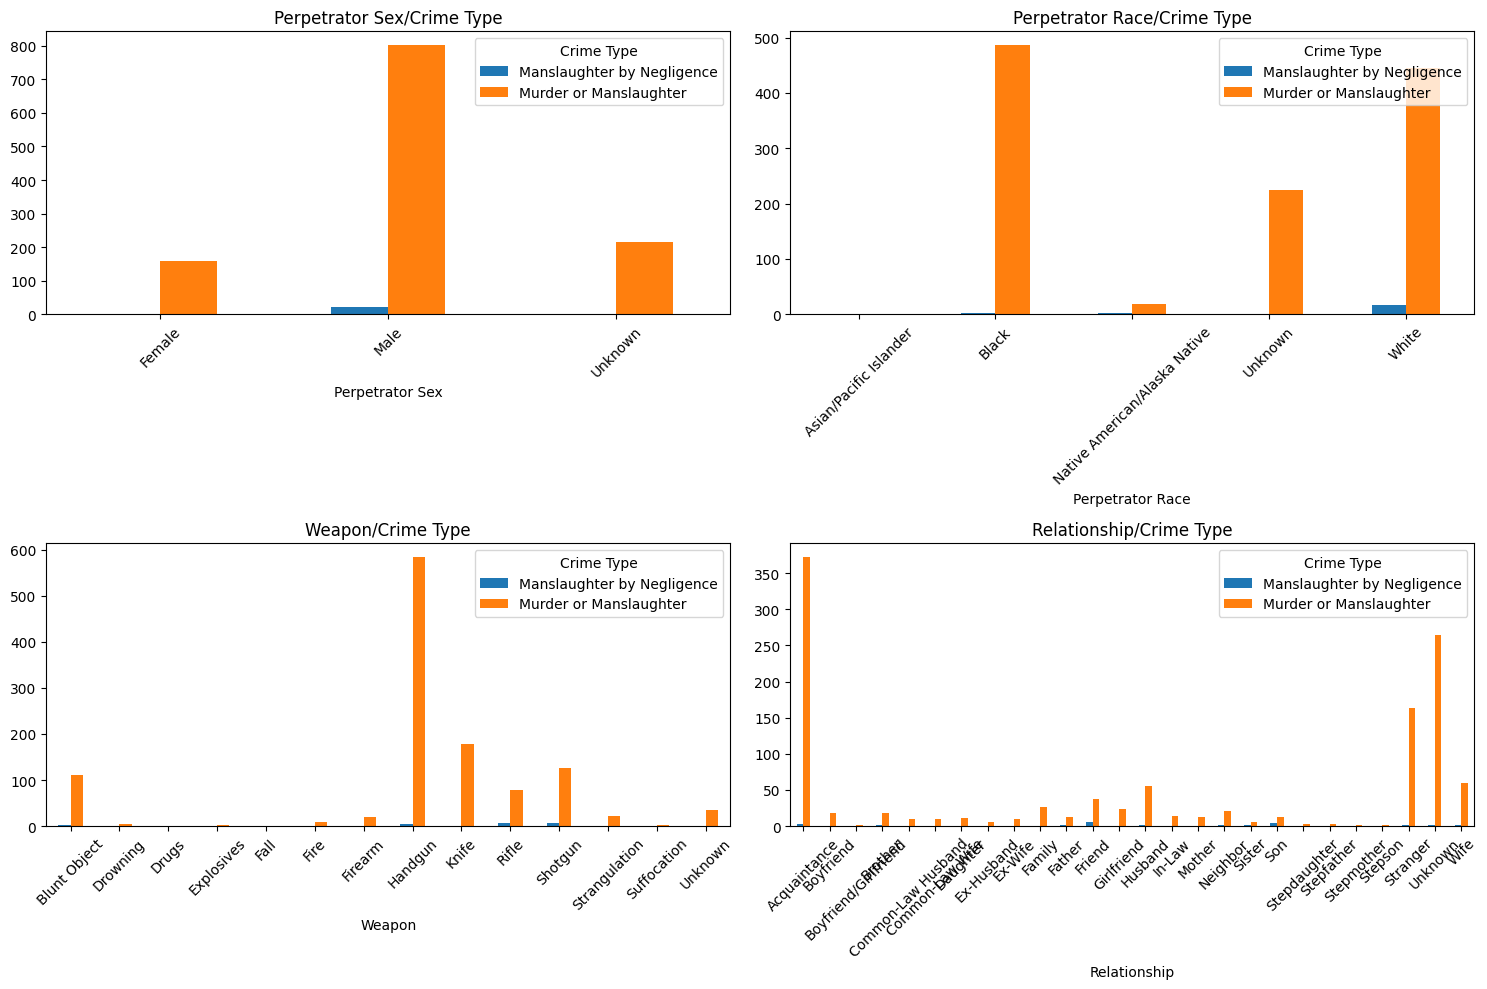

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
crimes['Crime Type'].value_counts().plot(kind='bar')
plt.title('Распределение типов преступлений')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
crimes['Perpetrator Age'] = pd.to_numeric(crimes['Perpetrator Age'], errors='coerce')
if 'Perpetrator Age' in crimes.columns:
    crimes['Perpetrator Age'].hist(bins=30)
    plt.title('Распределение возраста преступников')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numby = crimes.select_dtypes(include=[np.number])
if len(numby.columns) > 1:
    sns.heatmap(numby.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Матрица корреляций числовых признаков')
    plt.show()

cat_feet = ['Perpetrator Sex', 'Perpetrator Race', 'Weapon', 'Relationship']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, foot in enumerate(cat_feet):
    if foot in crimes.columns:
        pd.crosstab(crimes[foot], crimes['Crime Type']).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{foot}/Crime Type')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Вывод:


1.   Намеренных Убийств было гораздо больше, чем убийств по неосторожности
2.   Большая часть убийц находились в возрасте около 20 лет и около 35
3.   Большинство намеренных убийств и все непреднамернный были совершины мужчинами
4.   Белые люди совершают непреднамернные убийства чаще
5.   В основном орудием преступления является пистолет
6.   В штатах дробовик более популярное оружее, чем винтовка
7.   Чаще всего убийцей является знакомый парень жертвы
8.   От возраста жертвы зависит возраст убийцы и количество убийств


# Feature Engineering

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {} # Кодируем категориальные переменные
cat_col = crimes.select_dtypes(include=['object']).columns

for column in cat_col:
    if column != 'Crime Type':
        lebel = LabelEncoder()
        crimes[column] = lebel.fit_transform(crimes[column].astype(str))
        label_encoders[column] = lebel

encoder = LabelEncoder()
y = encoder.fit_transform(crimes['Crime Type'])

if 'Perpetrator Age' in crimes.columns:
    crimes['Lil_Pips'] = (crimes['Perpetrator Age'] < 18).astype(int)

X = crimes.drop('Crime Type', axis=1)

print(f"Финальный размер признаков: {X.shape}")

Финальный размер признаков: (1200, 20)


#Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания для библиотечных реализаций (например, из sklearn) четырёх методов классификации.

----
подготовим тестовые данные

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

scaler = StandardScaler()
X_train_ts = scaler.fit_transform(X_train)
X_test_tr = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(960, 20)
(240, 20)


Функция для оценки моделей, также возвращаем 0, которые мы заменили на Nan, для верных графиков

In [35]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def evali(modelka, X_train, X_test, y_train, y_test):
    modelka.fit(X_train, y_train)
    y_pred = modelka.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(modelka, X_train, y_train, cv=5, scoring='f1_weighted')

    print(f"F1-Score на тестовых данных: {f1:.4f}")
    print(f"Средний F1-Score кросс-валидации: {cv_scores.mean():.4f}")

    return modelka, f1, cv_scores.mean()

Рассматриваем Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'max_features': ['sqrt', 'log2', None], 'bootstrap': [True, False]}
for_model = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=2, n_jobs=-1, verbose=1, scoring='f1_weighted')
for_model.fit(X_train, y_train)

y_pred = for_model.predict(X_test_tr)
test_f1 = f1_score(y_test, y_pred, average='weighted')

print(f"F1-Score на тестовых данных: {test_f1:.4f}")
print(f"Лучшие параметры Random Forest: {for_model.best_params_}")
print(f"Лучший F1-Score: {for_model.best_score_:.4f}")

Fitting 2 folds for each of 162 candidates, totalling 324 fits
F1-Score на тестовых данных: 0.3765
Лучшие параметры Random Forest: {'bootstrap': True, 'max_depth': 5, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 50}
Лучший F1-Score: 0.9730


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Рассматриваем SVM

In [37]:
imputer = SimpleImputer(strategy='median')
X_train_ts = imputer.fit_transform(X_train_ts)
X_test_tr = imputer.transform(X_test_tr)

svm_params = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=3, n_jobs=-1, scoring='f1_weighted')
svm_model, svm_f1, svm_cv = evali(svm_grid, X_train_ts, X_test_tr, y_train, y_test)
print(f"Лучшие параметры SVM: {svm_grid.best_params_}")

F1-Score на тестовых данных: 0.9689
Средний F1-Score кросс-валидации: 0.9709
Лучшие параметры SVM: {'C': 10, 'kernel': 'linear'}


Рассматриваем Logistic Regression

In [38]:
regression_params = {'C': [0.1, 1, 10], 'max_iter': [1000]}
regression = GridSearchCV(LogisticRegression(random_state=42), regression_params, cv=3, n_jobs=-1, scoring='f1_weighted')
reg_modelka, reg_f1, reg_cv = evali(regression, X_train_ts, X_test_tr, y_train, y_test)
print(f"Лучшие параметры Logistic Regression: {regression.best_params_}")

F1-Score на тестовых данных: 0.9689
Средний F1-Score кросс-валидации: 0.9720
Лучшие параметры Logistic Regression: {'C': 1, 'max_iter': 1000}


Рассматриваем K nearest neighbors

In [39]:
k_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
k_grid = GridSearchCV(KNeighborsClassifier(), k_params, cv=3, n_jobs=-1, scoring='f1_weighted')
k_grid.fit(X_train_ts, y_train)
kendal_model, k_f1, k_cv = evali(k_grid, X_train_ts, X_test_tr, y_train, y_test)
print(f"Лучшие параметры K nearest neighbors: {k_grid.best_params_}")

F1-Score на тестовых данных: 0.9689
Средний F1-Score кросс-валидации: 0.9736
Лучшие параметры K nearest neighbors: {'n_neighbors': 5, 'weights': 'uniform'}


#Сравнить все обученные модели, построить их матрицы ошибок. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.


Сравнение моделей:
               Modelka                                        Best Params  \
1                  SVM                      {'C': 10, 'kernel': 'linear'}   
2  Logistic Regression                         {'C': 1, 'max_iter': 1000}   
3                  KNN           {'n_neighbors': 5, 'weights': 'uniform'}   
0        Random Forest  {'bootstrap': True, 'max_depth': 5, 'max_featu...   

   Test F1-Score  CV F1-Score  
1       0.968860     0.972156  
2       0.968860     0.974261  
3       0.968860     0.974261  
0       0.376457     0.972994  


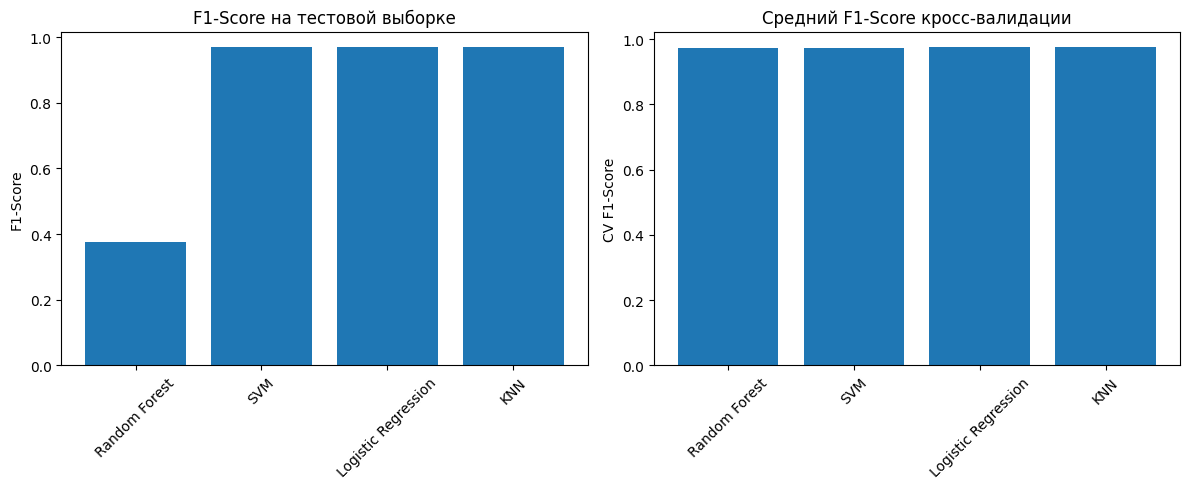

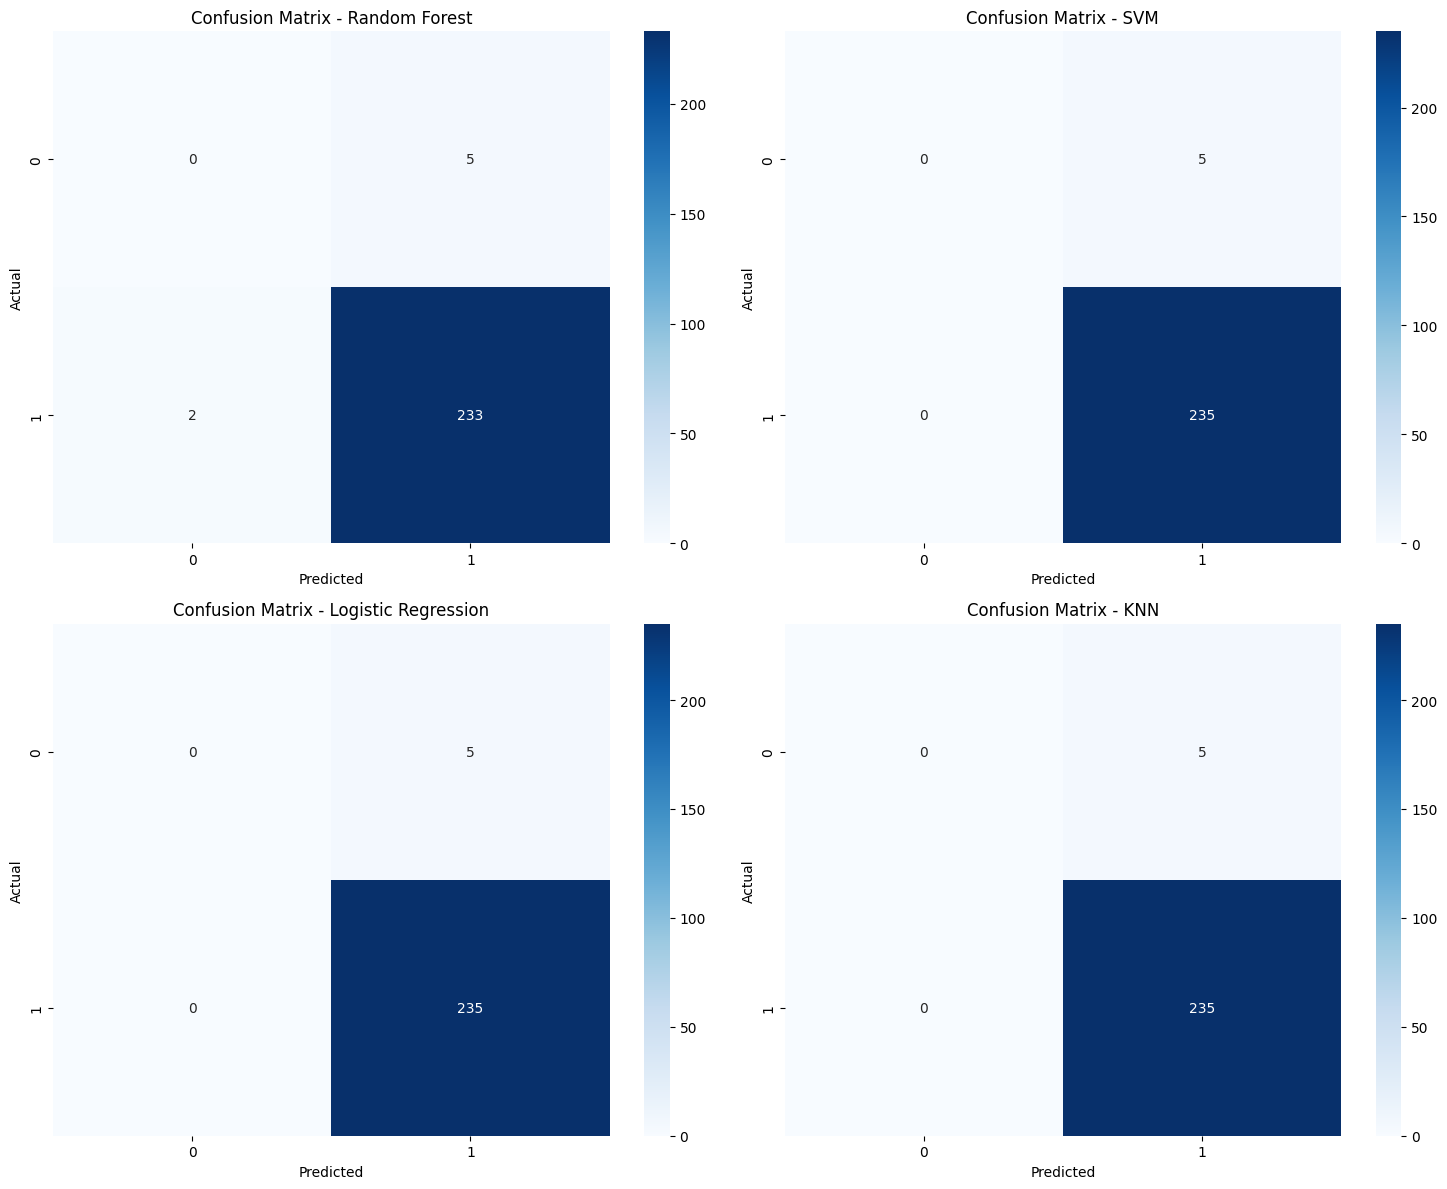

In [40]:
from sklearn.metrics import confusion_matrix

models_comparison = pd.DataFrame({
    'Modelka': ['Random Forest', 'SVM', 'Logistic Regression', 'KNN'],
    'Best Params': [for_model.best_params_, svm_model.best_params_, reg_modelka.best_params_, kendal_model.best_params_],
    'Test F1-Score': [test_f1, svm_f1, reg_f1, k_f1],
    'CV F1-Score': [for_model.best_score_, svm_model.best_score_, reg_modelka.best_score_, kendal_model.best_score_]  # Заменено на F1-Score
})

print("\nСравнение моделей:")
print(models_comparison.sort_values('Test F1-Score', ascending=False))

# Визуализация сравнения моделей
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(models_comparison['Modelka'], models_comparison['Test F1-Score'])
plt.title('F1-Score на тестовой выборке')
plt.xticks(rotation=45)
plt.ylabel('F1-Score')

plt.subplot(1, 2, 2)
plt.bar(models_comparison['Modelka'], models_comparison['CV F1-Score'])
plt.title('Средний F1-Score кросс-валидации')
plt.xticks(rotation=45)
plt.ylabel('CV F1-Score')

plt.tight_layout()
plt.show()

models = [for_model, svm_model, reg_modelka, kendal_model]
model_names = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (model, name) in enumerate(zip(models, model_names)):
    if name in ['SVM', 'Logistic Regression', 'KNN']:
        y_pred = model.predict(X_test_tr)
    else:
        y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Вывод по моделям:


*   Random forest показывает самые худшие результаты. Она почти идеальна на тестовых данных, но показывает плохие результаты на практике
*   Остальные модели предсказывают данные одинакого точно, на моем датасете ошибок нет

